Gradient Boosting Machine (GBM) classifiers are a family of powerful machine learning algorithms that are widely used for classification tasks. These techniques combine weak learners (usually decision trees) to create a strong classifier

Step 1: Setup and Import Libraries

In [1]:
# Install necessary libraries
!pip install xgboost lightgbm catboost -q

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Step 2: Create and Prepare the Dataset


In [2]:
# Generate a synthetic classification dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    random_state=42, class_sep=0.7
)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Step 3: Gradient Boosting Classifier

* Sequentially trains decision trees, with each tree attempting to correct errors made by the previous ones.
* Uses the gradient of a specified loss function (e.g., log loss for classification) to improve predictions.

Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       160
           1       0.84      0.86      0.85       140

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



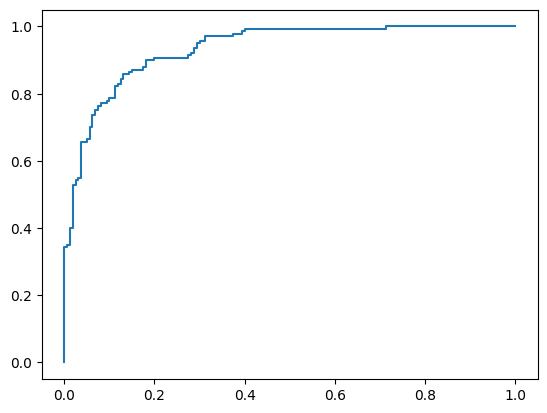

In [3]:
# Train the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Evaluate and visualize results
y_pred_gbm = gbm.predict(X_test)
y_pred_prob_gbm = gbm.predict_proba(X_test)[:, 1]

print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, y_pred_gbm))

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_gbm)
plt.plot(fpr, tpr, label='GBM (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob_gbm)))


* The ROC curve for GBM reflects its performance in separating classes.
* The AUC score (area under the curve) quantifies its classification ability, with higher values indicating better performance.

Step 4: Extreme Gradient Boosting (XGBoost)
* Builds on traditional GBM by adding regularization to prevent overfitting.
* Supports distributed and parallel computation for faster training.
* Handles missing values effectively.


XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       160
           1       0.84      0.91      0.87       140

    accuracy                           0.87       300
   macro avg       0.87      0.88      0.87       300
weighted avg       0.88      0.87      0.87       300



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:19:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


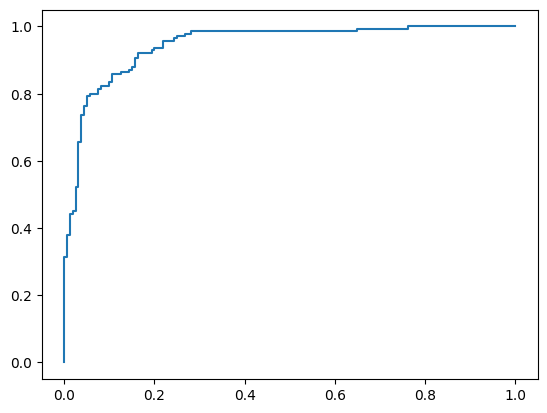

In [4]:
# Train the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate and visualize results
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("\nXGBoost Classifier Report:")
print(classification_report(y_test, y_pred_xgb))

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_xgb)
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob_xgb)))


The ROC curve for XGBoost often shows better separation than GBM, with a typically higher AUC score due to its robust optimization techniques.

Step 5: Light Gradient Boosting Machine (LightGBM)
* Employs a histogram-based algorithm for faster data splitting.
* Grows trees leaf-wise (instead of level-wise) for more flexible and efficient fitting.

[LightGBM] [Info] Number of positive: 358, number of negative: 342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4672
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511429 -> initscore=0.045722
[LightGBM] [Info] Start training from score 0.045722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

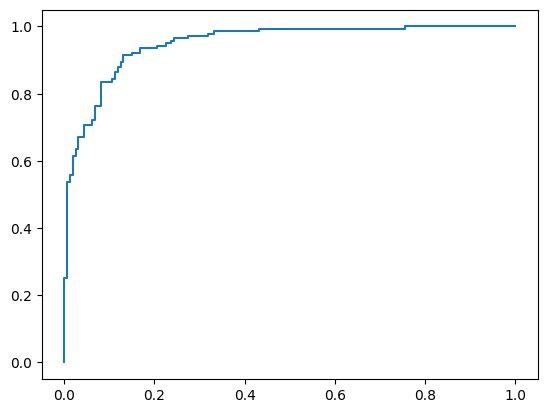

In [5]:
# Train the LightGBM Classifier
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Evaluate and visualize results
y_pred_lgb = lgb_model.predict(X_test)
y_pred_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]

print("\nLightGBM Classifier Report:")
print(classification_report(y_test, y_pred_lgb))

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lgb)
plt.plot(fpr, tpr, label='LightGBM (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob_lgb)))


LightGBM’s ROC curve is often comparable to XGBoost or slightly better in some cases, especially with larger datasets.

Step 6: Categorical Boosting (CatBoost)
* Specifically optimized for handling categorical features without extensive preprocessing (e.g., one-hot encoding).
* Uses ordered boosting to reduce overfitting during training.



CatBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       160
           1       0.87      0.95      0.91       140

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



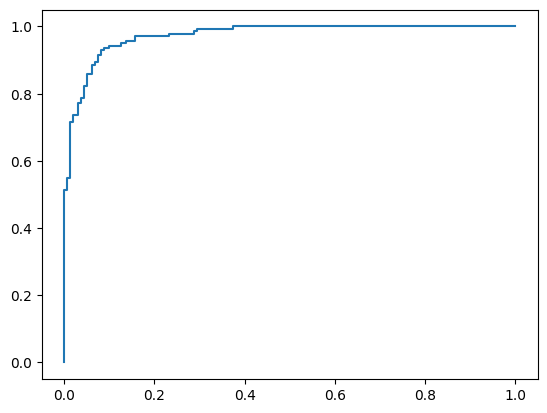

In [6]:
# Train the CatBoost Classifier
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Evaluate and visualize results
y_pred_cat = cat_model.predict(X_test)
y_pred_prob_cat = cat_model.predict_proba(X_test)[:, 1]

print("\nCatBoost Classifier Report:")
print(classification_report(y_test, y_pred_cat))

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_cat)
plt.plot(fpr, tpr, label='CatBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob_cat)))


CatBoost’s ROC curve might outperform others when the dataset contains many categorical features or when preprocessing is minimal.

Step 7: Visualize and Compare Models

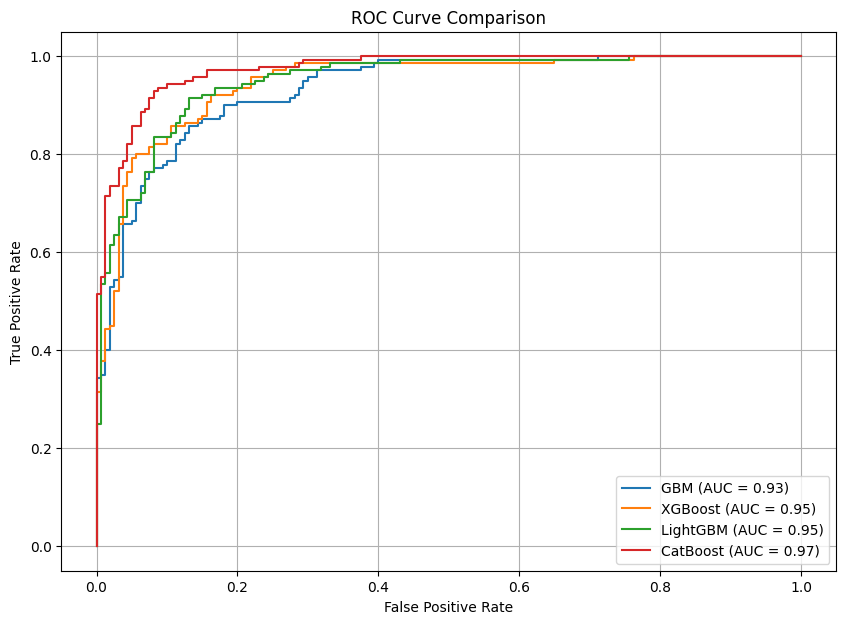

In [8]:
# Create a new figure for the ROC comparison
plt.figure(figsize=(10, 7))

# Gradient Boosting Classifier
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_pred_prob_gbm)
plt.plot(fpr_gbm, tpr_gbm, label='GBM (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob_gbm)))

# XGBoost Classifier
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob_xgb)))

# LightGBM Classifier
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_prob_lgb)
plt.plot(fpr_lgb, tpr_lgb, label='LightGBM (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob_lgb)))

# CatBoost Classifier
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_pred_prob_cat)
plt.plot(fpr_cat, tpr_cat, label='CatBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob_cat)))

# Finalize the plot
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Comparison in the Plots
1. GBM: Serves as the baseline. Its AUC score and ROC curve might be slightly lower due to the lack of advanced optimizations.
2. XGBoost: Improves on GBM, showing higher AUC scores and better ROC curves due to regularization and optimization.
3. LightGBM: Comparable to or better than XGBoost, especially for large datasets, with fast computation.
4. CatBoost: Outperforms others when categorical data is present or preprocessing is minimal.